# Library

In [41]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, RobustScaler # 데이터 표준화

%matplotlib inline

# Data Load

In [73]:
# 엑셀 파일 불러오기
Train_set = pd.read_csv('./data/train.csv', header = 0, index_col =0)
Test_set = pd.read_csv('./data/test.csv', header = 0, index_col =0)
Submission_set = pd.read_csv('./data/sample_submission.csv', header = 0, index_col = 0)
Train_set

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683,0


# Data Preview

In [4]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
u            320000 non-null float64
g            320000 non-null float64
r            320000 non-null float64
i            320000 non-null float64
z            320000 non-null float64
redshift     320000 non-null float64
dered_u      320000 non-null float64
dered_g      320000 non-null float64
dered_r      320000 non-null float64
dered_i      320000 non-null float64
dered_z      320000 non-null float64
nObserve     320000 non-null int64
nDetect      320000 non-null int64
airmass_u    320000 non-null float64
airmass_g    320000 non-null float64
airmass_r    320000 non-null float64
airmass_i    320000 non-null float64
airmass_z    320000 non-null float64
class        320000 non-null int64
dtypes: float64(16), int64(3)
memory usage: 48.8 MB


In [8]:
Test_set.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,19.859840,18.437104,17.739743,17.306491,17.148951,0.060083,19.634952,18.263779,17.619340,17.217804,16.870231,6.349950,6.15775,1.175956,1.176733,1.175311,1.175616,1.176326
std,1.954254,1.702973,1.478590,1.320742,24.643062,0.346845,1.921030,1.665741,1.476002,1.332361,35.436707,8.872794,8.55086,0.116424,0.118197,0.114845,0.115609,0.117285
min,-0.338524,-51.175280,-5.438650,5.326743,-39.527151,-30.148965,-30.633700,-18.655990,-8.756023,-3.697258,-9999.000000,1.000000,1.00000,1.000143,1.000086,1.000177,1.000150,1.000148
25%,18.727258,17.477982,16.881969,16.525463,16.288210,0.000034,18.570860,17.352245,16.790630,16.456230,16.230968,1.000000,1.00000,1.088091,1.088294,1.087693,1.087911,1.088175
50%,19.426062,18.145087,17.529944,17.155994,16.921198,0.047115,19.267415,18.024665,17.448660,17.091210,16.873305,2.000000,2.00000,1.179353,1.179252,1.179373,1.179390,1.179326
75%,20.434422,19.079345,18.434472,18.007966,17.733311,0.094769,20.199885,18.894768,18.295210,17.910950,17.657802,5.000000,5.00000,1.227833,1.226165,1.229388,1.228922,1.226935
max,56.847135,94.359125,46.691343,33.025919,6976.392220,46.390495,30.889910,30.952920,31.653620,30.947770,28.644080,44.000000,42.00000,2.050215,2.079697,2.021604,2.035784,2.064815


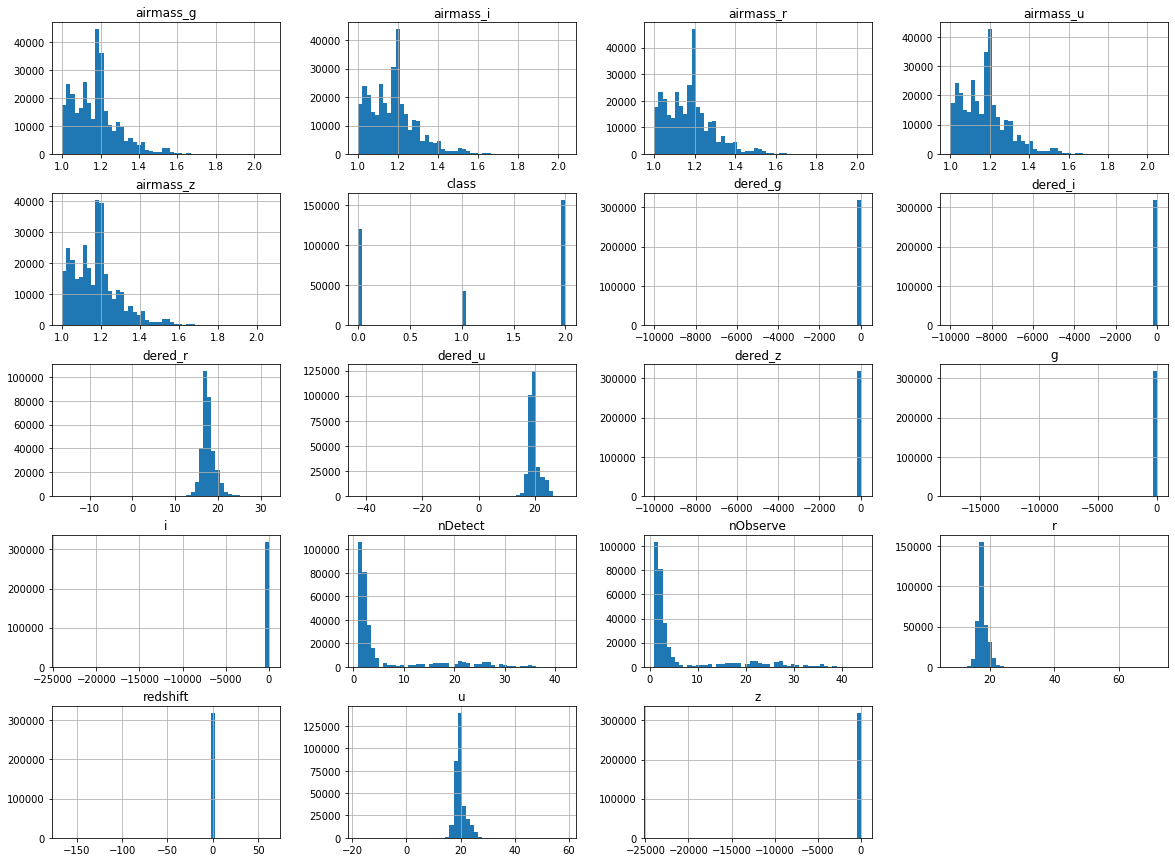

In [9]:
# 데이터 히스토그램
Train_set.hist(bins = 50, figsize=(20,15))
plt.show()

In [44]:
Train_set.hist?

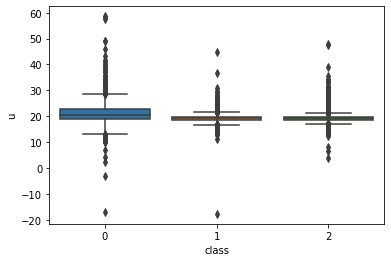

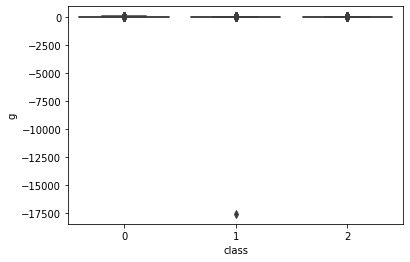

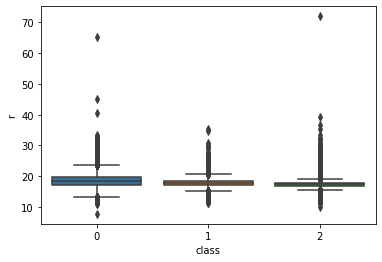

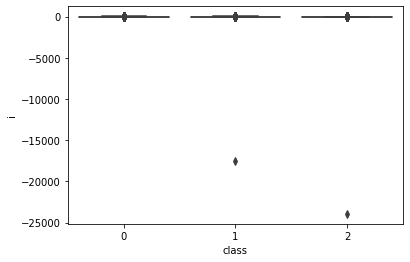

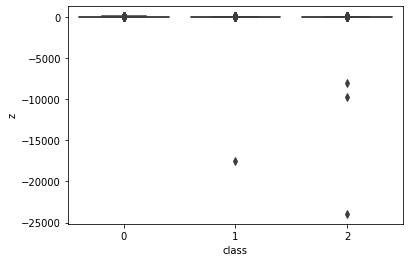

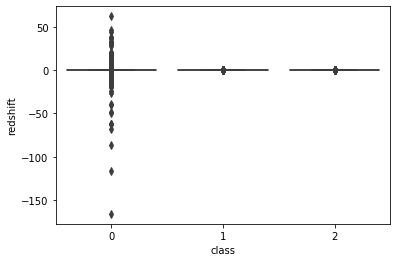

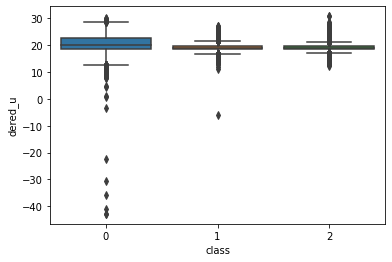

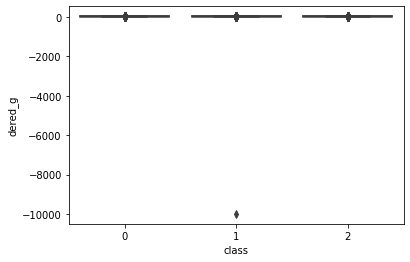

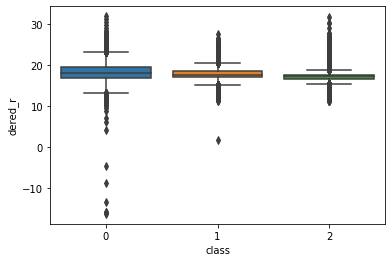

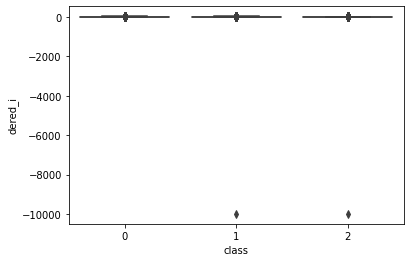

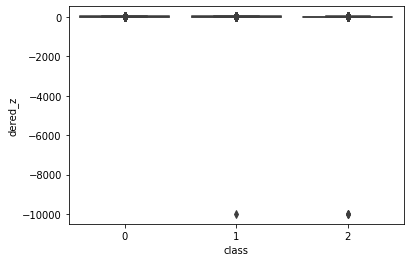

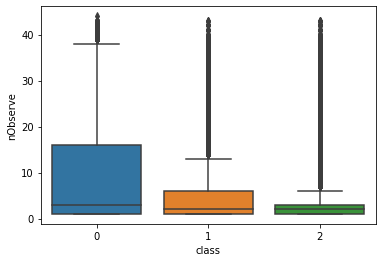

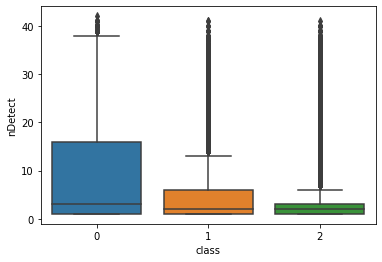

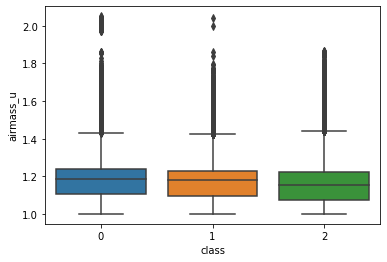

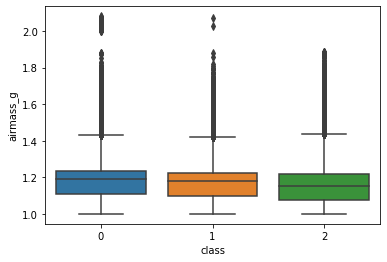

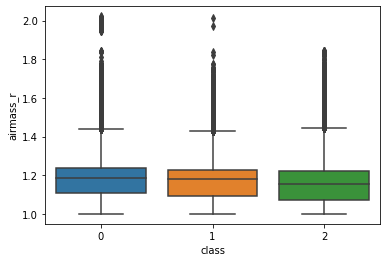

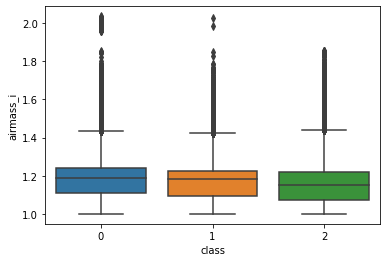

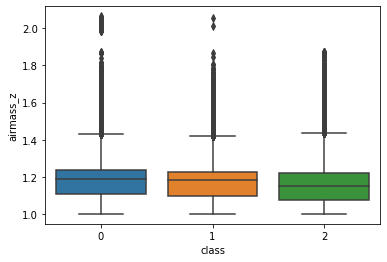

In [10]:
for i in list(Train_set.columns)[:-1]:
    sns.boxplot(x= Train_set['class'], y = Train_set[i])
    plt.show()

In [49]:
# 데이터 공분산
Train_set.corr()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1.000000,0.048621,0.818125,0.017466,0.014199,-0.009243,0.935217,0.081037,0.782799,0.034951,0.021438,0.227273,0.221087,0.076302,0.076066,0.076441,0.076385,0.076197,-0.379313
g,0.048621,1.000000,0.049739,0.591288,0.543726,-0.000360,0.046967,0.998955,0.048157,0.707392,0.500364,0.011722,0.011415,0.001999,0.001934,0.002064,0.002032,0.001967,-0.019501
r,0.818125,0.049739,1.000000,0.022797,0.019127,-0.006304,0.805675,0.085505,0.969504,0.047424,0.030600,0.205900,0.195569,0.076337,0.075987,0.076592,0.076478,0.076175,-0.374905
i,0.017466,0.591288,0.022797,1.000000,0.919717,-0.000152,0.017510,0.590351,0.022486,0.987939,0.699012,0.005619,0.005580,-0.000755,-0.000829,-0.000679,-0.000718,-0.000792,-0.010138
z,0.014199,0.543726,0.019127,0.919717,1.000000,-0.000164,0.014029,0.542776,0.018913,0.908595,0.918965,0.005214,0.005192,-0.001465,-0.001521,-0.001406,-0.001436,-0.001493,-0.009960
redshift,-0.009243,-0.000360,-0.006304,-0.000152,-0.000164,1.000000,-0.007582,-0.000194,-0.002980,-0.000109,-0.000199,-0.007774,-0.007607,0.001382,0.001393,0.001370,0.001376,0.001387,0.073773
dered_u,0.935217,0.046967,0.805675,0.017510,0.014029,-0.007582,1.000000,0.086856,0.840528,0.037958,0.023229,0.222395,0.216898,0.088256,0.087821,0.088580,0.088433,0.088053,-0.337930
dered_g,0.081037,0.998955,0.085505,0.590351,0.542776,-0.000194,0.086856,1.000000,0.088660,0.707221,0.500081,0.019654,0.019033,0.005871,0.005777,0.005959,0.005916,0.005825,-0.030445
dered_r,0.782799,0.048157,0.969504,0.022486,0.018913,-0.002980,0.840528,0.088660,1.000000,0.049042,0.031533,0.199952,0.189958,0.083917,0.083433,0.084297,0.084121,0.083689,-0.341305
dered_i,0.034951,0.707392,0.047424,0.987939,0.908595,-0.000109,0.037958,0.707221,0.049042,1.000000,0.707473,0.011156,0.010817,0.001782,0.001696,0.001867,0.001825,0.001739,-0.018306


# Data Preprocessing

## 1. outlier 제거

In [69]:
# 전체 데이터가 아닌 각 클래스별(0,1,2)로 이상치 처리
train_copy = Train_set.copy()

def remove_outlier(data, column):
    
    # 클래스 0처리
    column_data_0 = data[data['class']==0][column]
    quan_25_0 = np.percentile(column_data_0.values, 25) # 1분위수
    quan_75_0 = np.percentile(column_data_0.values, 75) # 3분위수
    iqr_0 = quan_75_0 - quan_25_0 # IQR 계산
    iqr_0 *= 1.5
    lowest_0 = quan_25_0 - iqr_0 # 최솟값 설정
    highest_0 = quan_75_0 + iqr_0 # 최댓값 설정
    outlier_index_0 = column_data_0[(column_data_0 < lowest_0) | (column_data_0 > highest_0)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_0))
    
    # 클래스 1처리
    column_data_1 = data[data['class']==1][column]
    quan_25_1 = np.percentile(column_data_1.values, 25) # 1분위수
    quan_75_1 = np.percentile(column_data_1.values, 75) # 3분위수
    iqr_1 = quan_75_1 - quan_25_1 # IQR 계산
    iqr_1 *= 1.5
    lowest_1 = quan_25_1 - iqr_1 # 최솟값 설정
    highest_1 = quan_75_1 + iqr_1 # 최댓값 설정
    outlier_index_1 = column_data_1[(column_data_1 < lowest_1 )| (column_data_1 > highest_1)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_1))
    
    # 클래스 2 처리
    column_data_2 = data[data['class']==2][column]
    quan_25_2 = np.percentile(column_data_2.values, 25) # 1분위수
    quan_75_2 = np.percentile(column_data_2.values, 75) # 3분위수
    iqr_2 = quan_75_2 - quan_25_2 # IQR 계산
    iqr_2 *= 1.5
    lowest_2 = quan_25_2 - iqr_2 # 최솟값 설정
    highest_2 = quan_75_2 + iqr_2 # 최댓값 설정
    outlier_index_2 = column_data_2[(column_data_2 < lowest_2 )| (column_data_2 > highest_2)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_2))
    # outlier 행 제거
    data.drop(list(outlier_index_0) + list(outlier_index_1) + list(outlier_index_2), axis = 0, inplace = True)
    print(data.shape)
    return data

In [68]:
Train_set.columns[:-1]

Index(['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r',
       'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g',
       'airmass_r', 'airmass_i', 'airmass_z'],
      dtype='object')

In [70]:
Train_copy1 = Train_set.copy()
for col in Train_copy1.columns[:-1]:
    ROT = remove_outlier(Train_copy1, col)
    
    Train_copy1 = ROT
    
Train_copy1

122
1806
8667
(309405, 19)
645
438
4973
(303349, 19)
406
278
2751
(299914, 19)
212
241
1162
(298299, 19)
423
171
693
(297012, 19)
12552
1593
2733
(280134, 19)
122
697
1087
(278228, 19)
619
175
280
(277154, 19)
164
116
120
(276754, 19)
35
107
107
(276505, 19)
137
105
150
(276113, 19)
136
7663
11827
(256487, 19)
7
3221
11847
(241412, 19)
2501
913
3615
(234383, 19)
1082
167
841
(232293, 19)
19
15
83
(232176, 19)
0
0
0
(232176, 19)
77
0
13
(232086, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
6,23.906276,20.847207,19.978427,19.495200,19.052571,-0.000042,23.84584,20.70001,19.87659,19.42051,19.00401,2,2,1.201924,1.202019,1.201963,1.201927,1.201954,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319992,19.472131,17.950884,17.178280,16.778657,16.476769,0.091239,19.33696,17.85176,17.10959,16.72726,16.43697,1,1,1.116221,1.115751,1.116806,1.116499,1.115972,2
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1


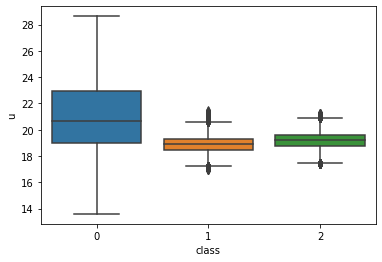

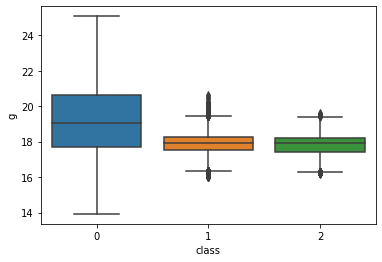

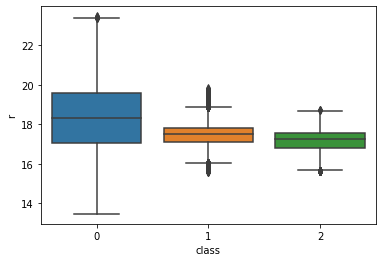

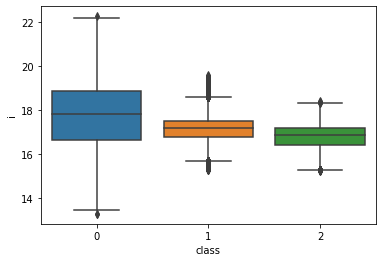

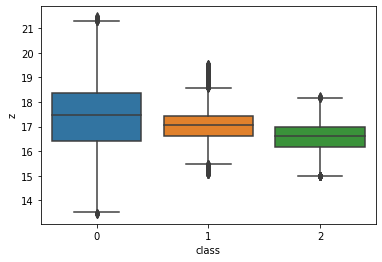

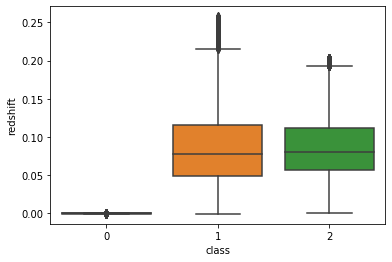

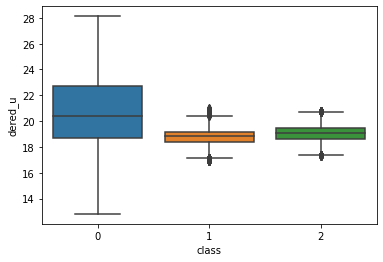

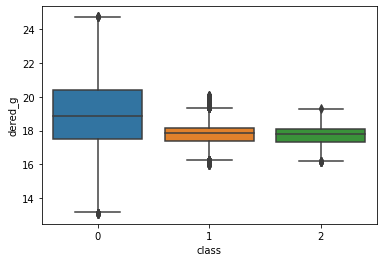

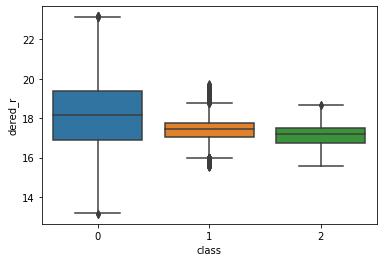

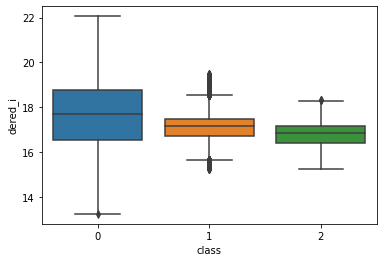

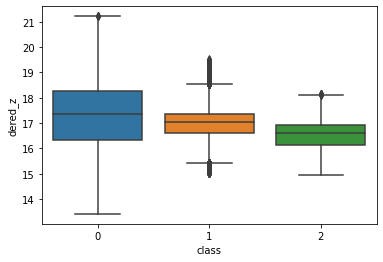

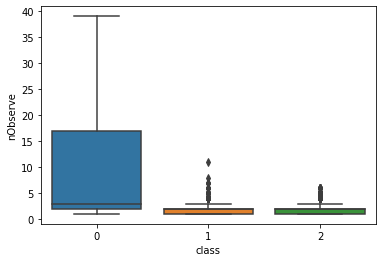

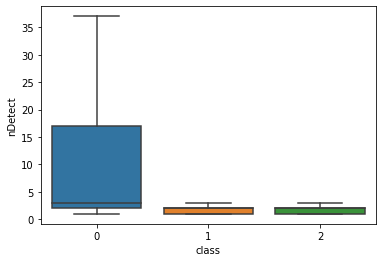

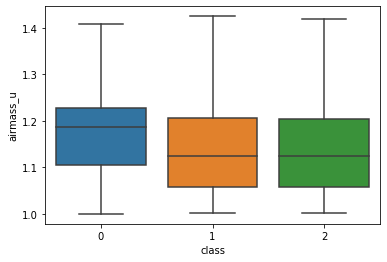

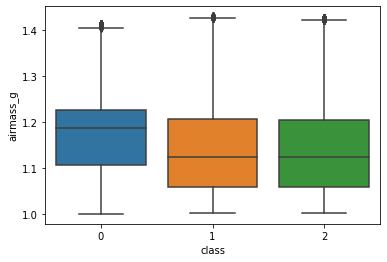

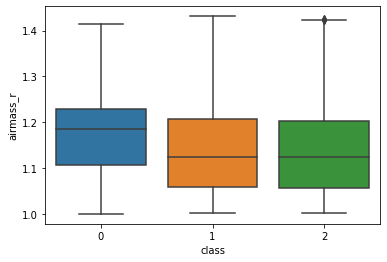

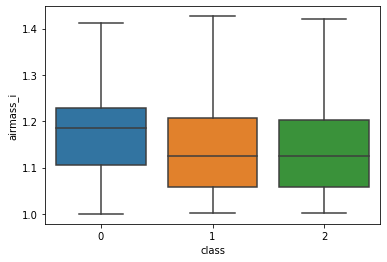

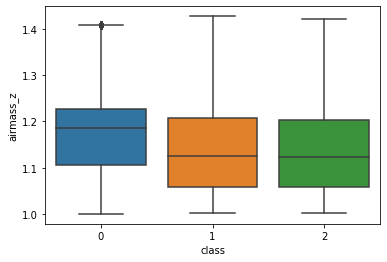

In [71]:
for i in list(Train_copy1.columns)[:-1]:
    sns.boxplot(x= Train_copy1['class'], y = Train_copy1[i])
    plt.show()

# 2. 표준화

In [43]:
# 표준화 : RobustScaler() :
# 이상치, 특이값에 덜 민감한" 중앙값(median)과 IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법
#  (x-median)/IQR )

x_RobustScaler = RobustScaler().fit_transform(Train_set)
x_RobustScaler

array([[ 2.25096502,  1.37409575,  0.95663898, ...,  0.07097471,
         0.0787459 , -0.5       ],
       [-2.55704925, -2.55177875, -2.62649742, ...,  0.50946359,
         0.55056407,  0.        ],
       [-1.54165324, -1.44845966, -1.28282507, ..., -1.1214217 ,
        -1.12678213, -0.5       ],
       ...,
       [ 1.03606177,  0.17695395, -0.14845576, ...,  0.09596435,
         0.10385821, -0.5       ],
       [-0.33505355, -0.51424183, -0.65776116, ..., -0.04925015,
        -0.04918459, -0.5       ],
       [ 0.25820525,  0.42503254,  0.63816509, ..., -0.86684462,
        -0.88584986, -0.5       ]])

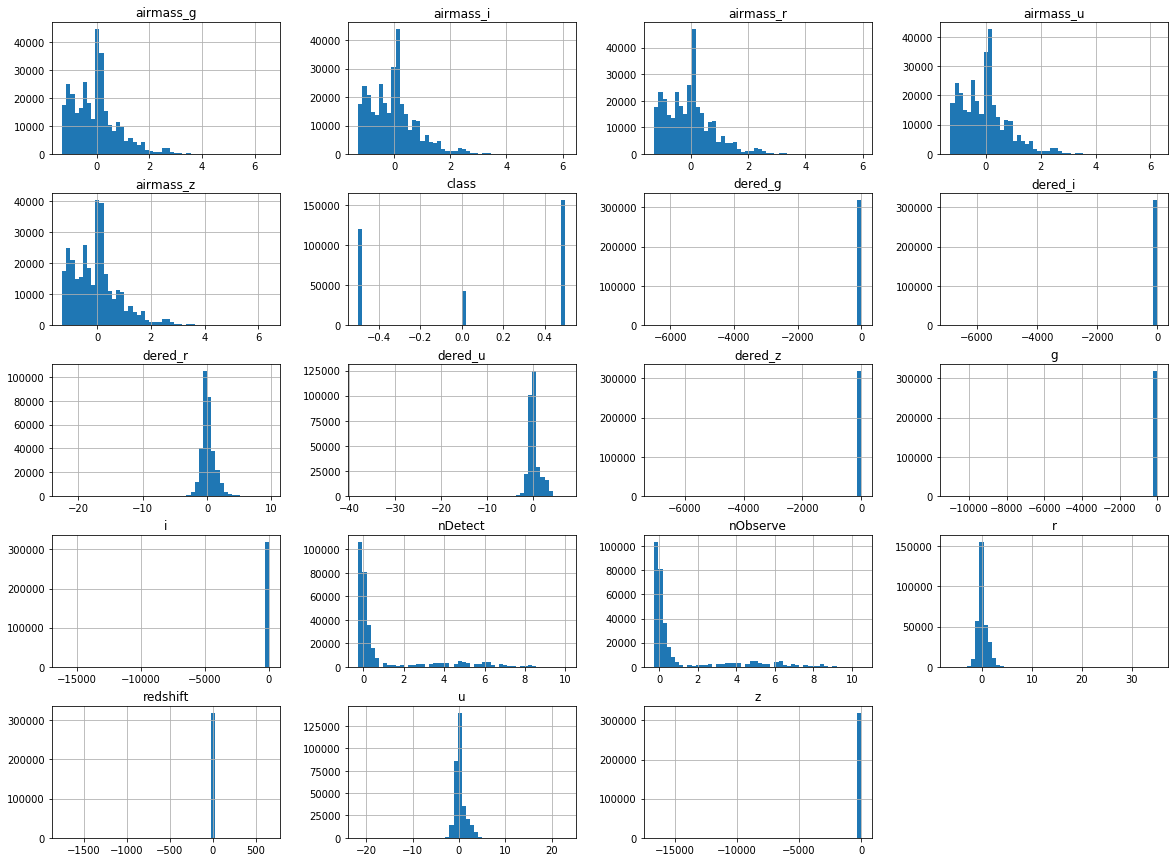

In [47]:
pd.DataFrame(x_RobustScaler, columns = Train_set.columns).hist(bins = 50,  figsize=(20,15))
plt.show()

# Spilting X, Y

In [37]:
# 모델 평가를 위한 훈련데이터 Split
seed = 0
size = 0.1 # Testing size
X = Train_set.drop('class', axis = 1)
Y = Train_set['class']
X_Train, X_Test, y_train, y_test = train_test_split(X, Y, test_size = size, random_state = seed)  

# modeling

In [20]:
model = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
model.fit(X_Train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=27,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1050, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb.XGBClassifier?

# Evaluation

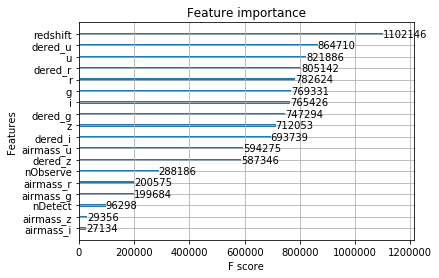

In [27]:
# plot importance(model)
plot_importance(model)

In [28]:
# 예측 평가
y_pred = model.predict(X_Test)
y_pred

array([2, 2, 2, ..., 0, 2, 0], dtype=int64)

In [29]:
# evaluate predictions
mean_squared_error(y_test, y_pred)

0.07075

In [30]:
# confusion matrix
confusion_matrix(y_pred, y_test)

array([[12010,     6,     4],
       [   12,  2870,   746],
       [   18,  1412, 14922]], dtype=int64)

In [31]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}%".format(accuracy * 100.0))

Accuracy: 93.13125%


In [32]:
result = model.predict(Test_set)
Submission_set['class'] = result
Submission_set.to_csv("submission.csv", encoding='utf-8')

In [93]:
Submission_set

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2
...,...
399995,0
399996,1
399997,0


==============================================================================================

# 파라미터 튜닝

In [13]:
for i in range(1, 30):
    print(i, "번째 학습")
    model = xgb.XGBClassifier(max_depth = i, learning_rate = 0.1)
    model.fit(X_Train, y_train)
    
    # 예측 평가
    y_pred = model.predict(X_Test)
    
    # evaluate predictions
    MSE = mean_squared_error(y_test, y_pred)
    print('MSE : %.2f'%MSE)
    # confusion matrix
    CM = confusion_matrix(y_pred, y_test)
    print(CM)
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}%".format(accuracy * 100.0))

1 번째 학습
MSE : 0.13
[[11986    15    20]
 [   19   420    83]
 [   35  3853 15569]]
Accuracy: 87.421875%
2 번째 학습
MSE : 0.10
[[11991     7     8]
 [   22  1729   487]
 [   27  2552 15177]]
Accuracy: 90.303125%
3 번째 학습
MSE : 0.09
[[12000     6     5]
 [   19  2025   546]
 [   21  2257 15121]]
Accuracy: 91.08125%
4 번째 학습
MSE : 0.09
[[12001     6     4]
 [   17  2222   626]
 [   22  2060 15042]]
Accuracy: 91.453125%
5 번째 학습
MSE : 0.08
[[12005     6     2]
 [   16  2295   613]
 [   19  1987 15057]]
Accuracy: 91.740625%
6 번째 학습
MSE : 0.08
[[12006     7     1]
 [   15  2434   648]
 [   19  1847 15023]]
Accuracy: 92.071875%
7 번째 학습
MSE : 0.08
[[12010     6     3]
 [   14  2489   663]
 [   16  1793 15006]]
Accuracy: 92.203125%
8 번째 학습
MSE : 0.08
[[12005     6     4]
 [   18  2564   686]
 [   17  1718 14982]]
Accuracy: 92.346875%
9 번째 학습
MSE : 0.08
[[12008     6     3]
 [   15  2616   691]
 [   17  1666 14978]]
Accuracy: 92.50625%
10 번째 학습
MSE : 0.07
[[12004     6     2]
 [   17  2665   664]
 [  

In [19]:
for i in range(100, 2000, 50):
    print(i, "번째 학습")
    model = xgb.XGBClassifier(max_depth = 14, n_estimators= i, learning_rate = 0.01)
    model.fit(X_Train, y_train)
    
    # 예측 평가
    y_pred = model.predict(X_Test)
    
    # evaluate predictions
    MSE = mean_squared_error(y_test, y_pred)
    print('MSE : %.2f'%MSE)
    # confusion matrix
    CM = confusion_matrix(y_pred, y_test)
    print(CM)
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}%".format(accuracy * 100.0))

100 번째 학습
MSE : 0.08
[[12006     5     7]
 [   16  2672   714]
 [   18  1611 14951]]
Accuracy: 92.590625%
150 번째 학습
MSE : 0.08
[[12007     5     8]
 [   16  2692   707]
 [   17  1591 14957]]
Accuracy: 92.675%
200 번째 학습
MSE : 0.07
[[12008     5     7]
 [   16  2720   703]
 [   16  1563 14962]]
Accuracy: 92.78125%
250 번째 학습
MSE : 0.07
[[12009     5     5]
 [   16  2730   713]
 [   15  1553 14954]]
Accuracy: 92.790625%
300 번째 학습
MSE : 0.07
[[12008     5     5]
 [   17  2751   715]
 [   15  1532 14952]]
Accuracy: 92.846875%
350 번째 학습
MSE : 0.07
[[12008     5     4]
 [   17  2771   708]
 [   15  1512 14960]]
Accuracy: 92.934375%
400 번째 학습
MSE : 0.07
[[12008     5     4]
 [   16  2772   711]
 [   16  1511 14957]]
Accuracy: 92.928125%
450 번째 학습
MSE : 0.07
[[12010     5     3]
 [   15  2785   716]
 [   15  1498 14953]]
Accuracy: 92.9625%
500 번째 학습
MSE : 0.07
[[12009     5     3]
 [   15  2790   714]
 [   16  1493 14955]]
Accuracy: 92.98125%
550 번째 학습
MSE : 0.07
[[12009     6     3]
 [   15  27

KeyboardInterrupt: 

# 아웃라이어 제거한 모델 학습

In [ ]:
# 모델 평가를 위한 훈련데이터 Split
seed = 0
size = 0.1 # Testing size
X1 = Train_copy1.drop(['class'], axis = 1)
Y1 = Train_copy1['class']
X_Train1, X_Test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = size, random_state = seed)  

model1 = xgb.XGBClassifier(max_depth = 27, n_estimators= 1050, learning_rate = 0.01)
model1.fit(X_Train1, y_train1)
    
    # 예측 평가
y_pred1 = model1.predict(X_Test1)
    
    # evaluate predictions
MSE = mean_squared_error(y_test1, y_pred1)
print('MSE : %.2f'%MSE)
    # confusion matrix
CM = confusion_matrix(y_pred1, y_test1)
print(CM)
    # accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy: {}%".format(accuracy * 100.0))

result1 = model1.predict(Test_set)
Submission_set['class'] = result1
Submission_set.to_csv("submission1.csv", encoding='utf-8')

In [ ]:
# 모델 평가를 위한 훈련데이터 Split

model3 = xgb.XGBClassifier(max_depth = 27, n_estimators= 1050, learning_rate = 0.01)
model3.fit(X1, Y1)
    
result3 = model3.predict(Test_set)
Submission_set['class'] = result3
Submission_set.to_csv("submission3.csv", encoding='utf-8')

# whole Data

In [39]:
model2 = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
model2.fit(X, Y)

result2 = model2.predict(Test_set)
Submission_set['class'] = result2
Submission_set.to_csv("submission1.csv", encoding='utf-8')

NameError: name 'result1' is not defined